# Data examination

The data is found in the following files:

- Computation results: `read.csv("..\\data\\results.csv", header = TRUE, sep = ",")`
- Fit data: `read.csv("..\\data\\results_fit.csv", header = TRUE, sep = ",")`
- Correlation lenghths: `read.csv("..\\data\\results_corr.csv", header = TRUE, sep = ",")`
- Correlation functions: `read.csv(paste("..\\data\\plot_data\\correlation_", index, ".csv", sep = ""), header = FALSE)`

In a first step we present a concise overview table over the correlation lenght data.

In [1]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\data\\results.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\data\\results_fit.csv", header = TRUE, sep = ",")
corr <- read.csv("..\\data\\results_corr.csv", header = TRUE, sep = ",")

# Removing unnecessary data
d <- corr[, !(names(corr) %in% c("m12", "m23", "m13", "m34", "m24", "m14"))]

# Rounding correlation lenghts
d$corr12 <- round(d$corr12, digits = 2)
d$corr23 <- round(d$corr23, digits = 2)
d$corr34 <- round(d$corr34, digits = 2)
d$corr13 <- round(d$corr13, digits = 2)
d$corr24 <- round(d$corr24, digits = 2)
d$corr14 <- round(d$corr14, digits = 2)
d$corr_fit <- round(fit$corr, digits = 2)

# Eventually removing correlation lenghts with momentum mode 4
#d <- d[, !(names(d) %in% c("corr34", "corr24", "corr14"))]

# Adding additional info
temps <- c()
max_ts <- c()
for (index in d$index) {
	temps <- append(temps, results$temp[results$index == index])
	max_ts <- append(max_ts, results$t[results$index == index])
}
d$temp <- temps
d$max_t <- max_ts

# Reordering columns
overview <- d[, c("index", "max_t", "temp", "corr12", "corr23", "corr13", "corr_fit", "corr34", "corr24", "corr14")]

# Looking at the interesting data
#overview[overview$temp >= 0.1 & overview$temp < 0.7, ]
overview[overview$index >= 50, ]

,index,max_t,temp,corr12,corr23,corr13,corr_fit,corr34,corr24,corr14
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51,50,16,0.20,18.83,193.70,115.36,6743261.67,7.40,18.38,32.65
52,51,16,0.22,35.14,3.81,9.50,16.64,3.13,4.60,10.12
53,52,16,0.25,13.56,7.83,13.75,14.39,4.49,6.61,11.49
54,53,16,0.27,7.83,20.17,11.73,8.86,2.47,8.08,9.16
55,54,16,0.30,4.58,2.72,3.98,4.45,4.73,3.67,4.30
56,55,16,0.33,3.12,2.43,2.92,3.06,5.77,3.58,3.24
57,56,16,0.37,1.94,2.11,1.99,1.96,1.63,1.93,1.94
58,57,16,0.41,1.48,1.46,1.46,1.44,1.23,1.36,1.42
59,58,16,0.45,1.08,1.11,1.09,1.07,0.84,0.99,1.03


## Correlation lenghts

In [2]:
# Defining the performed simulations to extract the data.
simulations <- data.frame(list(
	size = c(16, 16, 24, 36, 54, 16, 24, 36, 54),
	lowest_index = c(0, 10, 20, 30, 40, 50, 60, 70, 80),
	hightest_index = c(9, 19, 29, 39, 49, 59, 69, 79, 89)
))

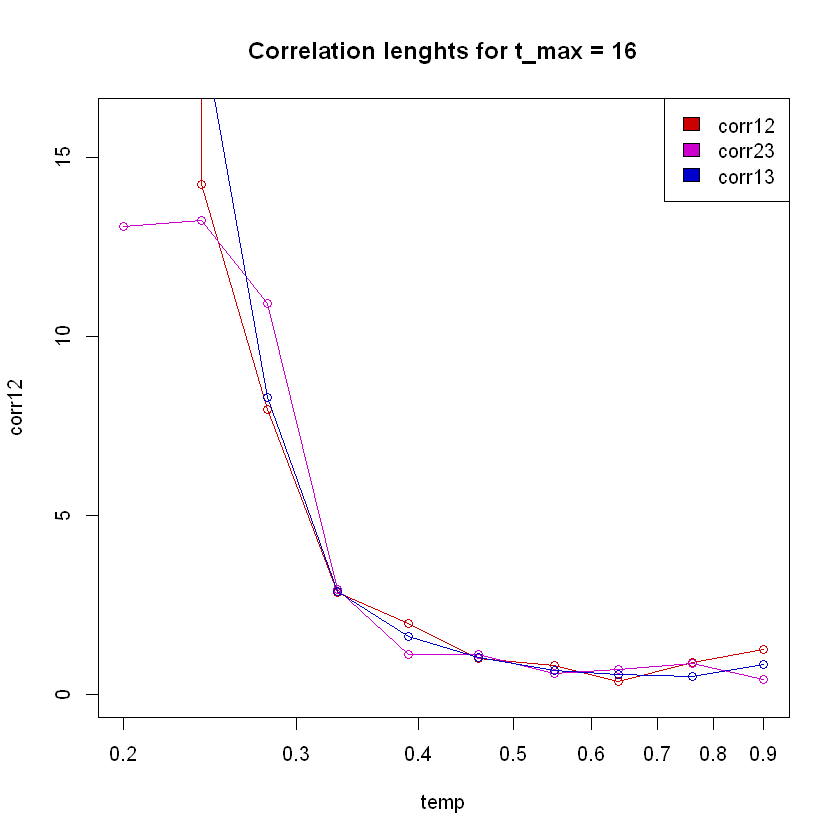

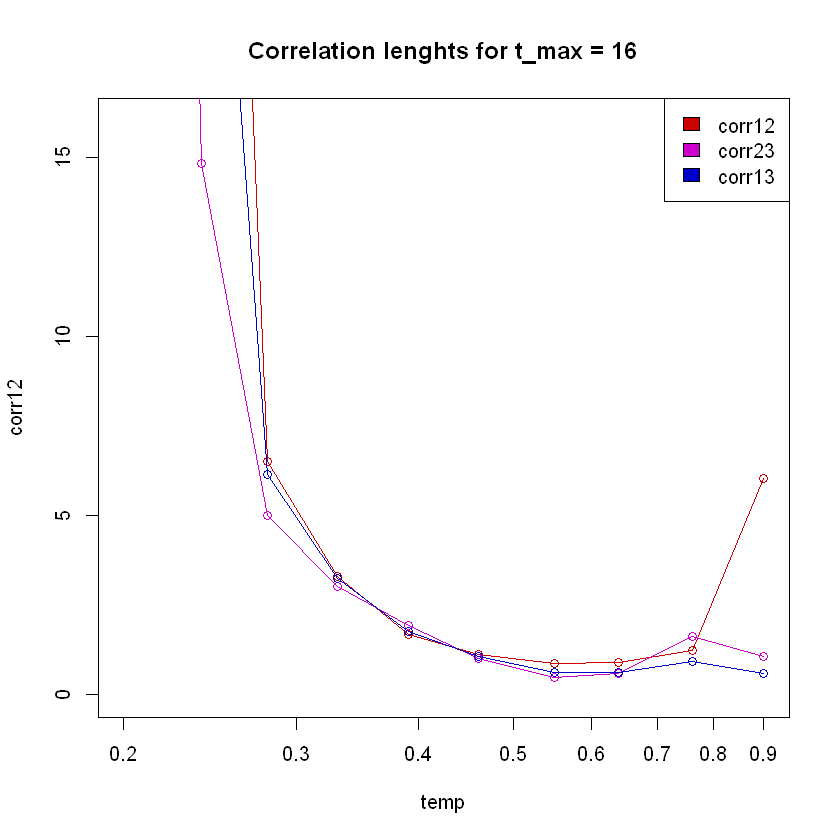

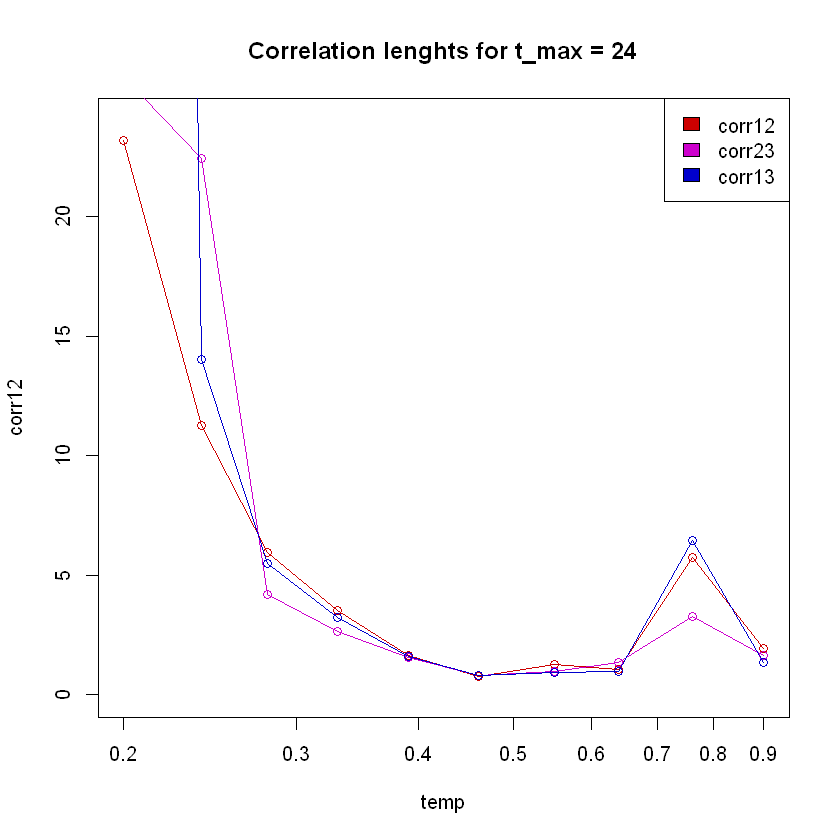

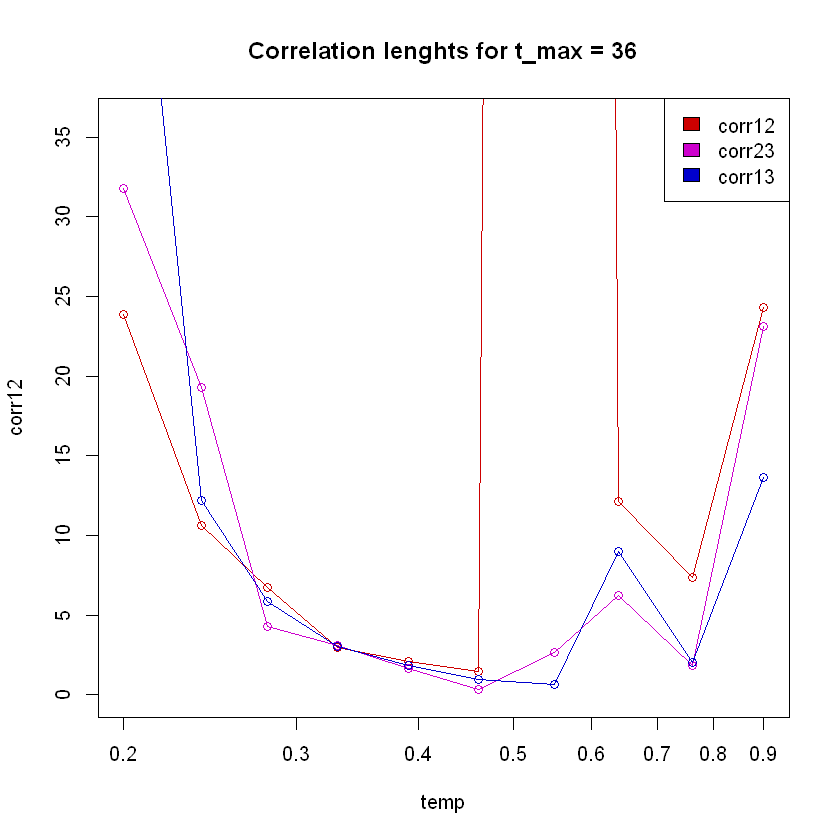

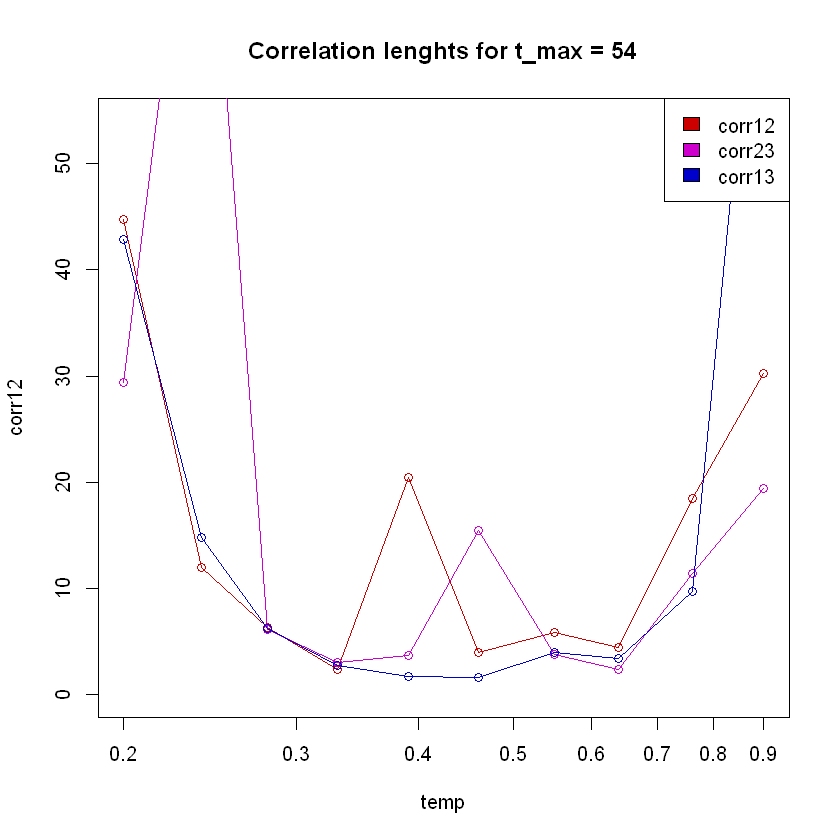

In [3]:
# These are the first five simulations with the less broad temp range
for (sim_index in 1:5) {
	size <- simulations$size[sim_index]
	lowest_index <- simulations$lowest_index[sim_index]
	hightest_index <- simulations$hightest_index[sim_index]

	d <- overview[overview$index >= lowest_index & overview$index <= hightest_index, ]

	plot(corr12 ~ temp, data = d, log = "x", ylim = c(0, size), col = "red3", type = "o")
	title(paste("Correlation lenghts for t_max =", size))
	legend <- list(names = c("corr12"), cols = "red3")

	add_plot_line <- function(formula, name, col) {
		points(formula, data = d, col = col)
		lines(formula, data = d, col = col)
		legend$names <- append(legend$names, c(name))
		legend$cols <- append(legend$cols, c(col))
		legend
	}

	legend <- add_plot_line(corr23 ~ temp, "corr23", "magenta3")
	#legend <- add_plot_line(corr34 ~ temp, "corr34", "purple3")
	legend <- add_plot_line(corr13 ~ temp, "corr13", "blue3")
	#legend <- add_plot_line(corr24 ~ temp, "corr24", "skyblue3")
	#legend <- add_plot_line(corr14 ~ temp, "corr14", "green3")

	legend("topright", y = legend$names, fill = legend$cols)
}

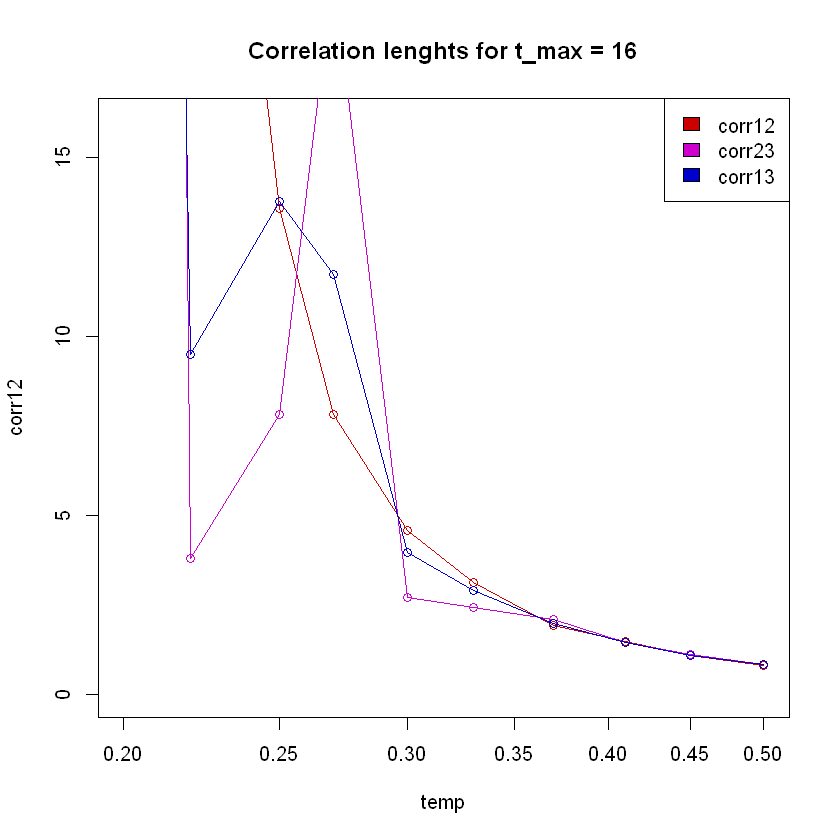

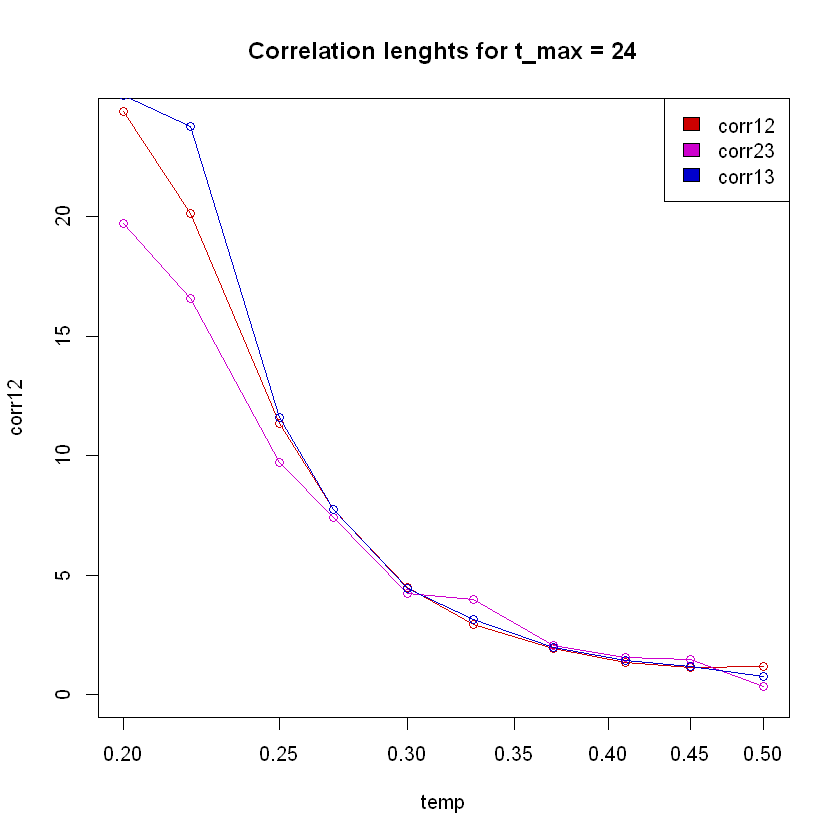

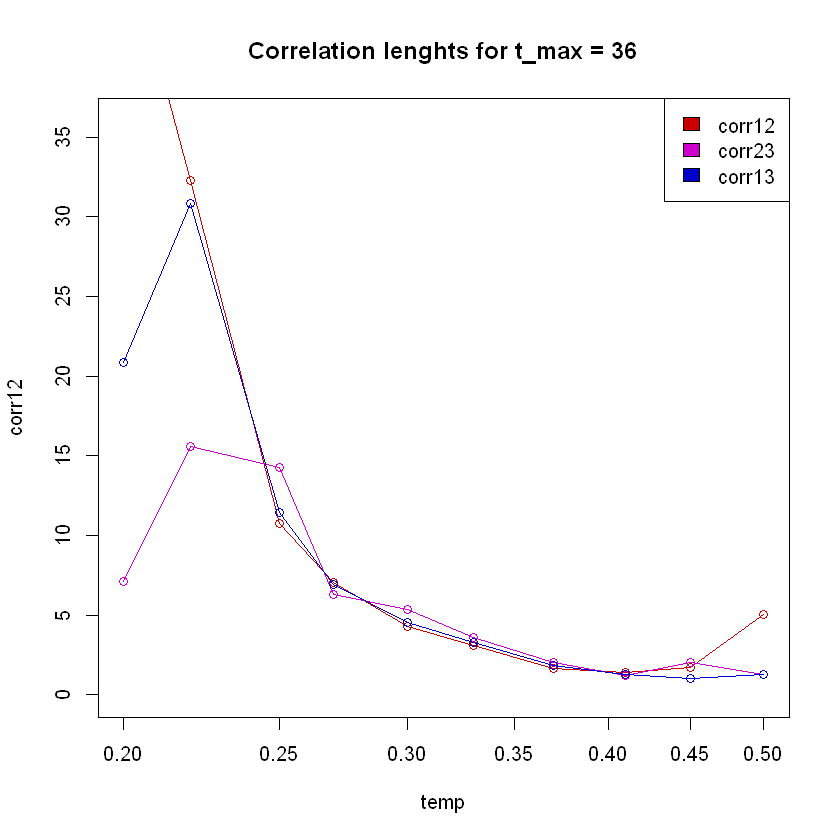

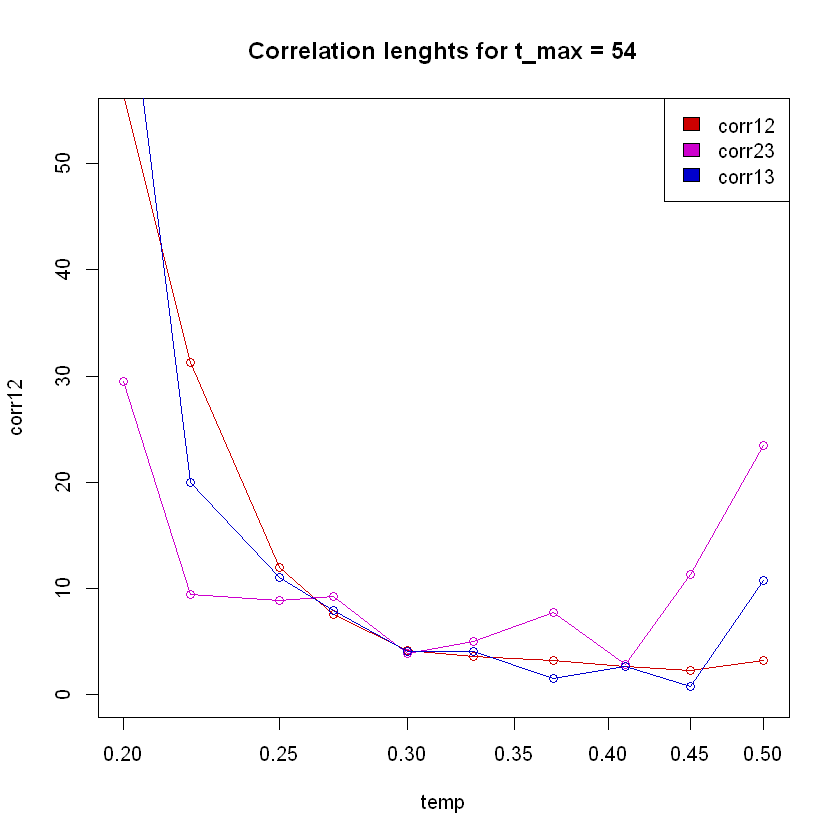

In [32]:
# These are the first five simulations with the even less broad temp range 0.2 to 0.5
for (sim_index in 6:nrow(simulations)) {
	size <- simulations$size[sim_index]
	lowest_index <- simulations$lowest_index[sim_index]
	hightest_index <- simulations$hightest_index[sim_index]

	d <- overview[overview$index >= lowest_index & overview$index <= hightest_index, ]

	plot(corr12 ~ temp, data = d, log = "x", ylim = c(0, size), col = "red3", type = "o")
	title(paste("Correlation lenghts for t_max =", size))
	legend <- list(names = c("corr12"), cols = "red3")

	add_plot_line <- function(formula, name, col) {
		points(formula, data = d, col = col)
		lines(formula, data = d, col = col)
		legend$names <- append(legend$names, c(name))
		legend$cols <- append(legend$cols, c(col))
		legend
	}

	legend <- add_plot_line(corr23 ~ temp, "corr23", "magenta3")
	#legend <- add_plot_line(corr34 ~ temp, "corr34", "purple3")
	legend <- add_plot_line(corr13 ~ temp, "corr13", "blue3")
	#legend <- add_plot_line(corr24 ~ temp, "corr24", "skyblue3")
	#legend <- add_plot_line(corr14 ~ temp, "corr14", "green3")

	legend("topright", y = legend$names, fill = legend$cols)
}

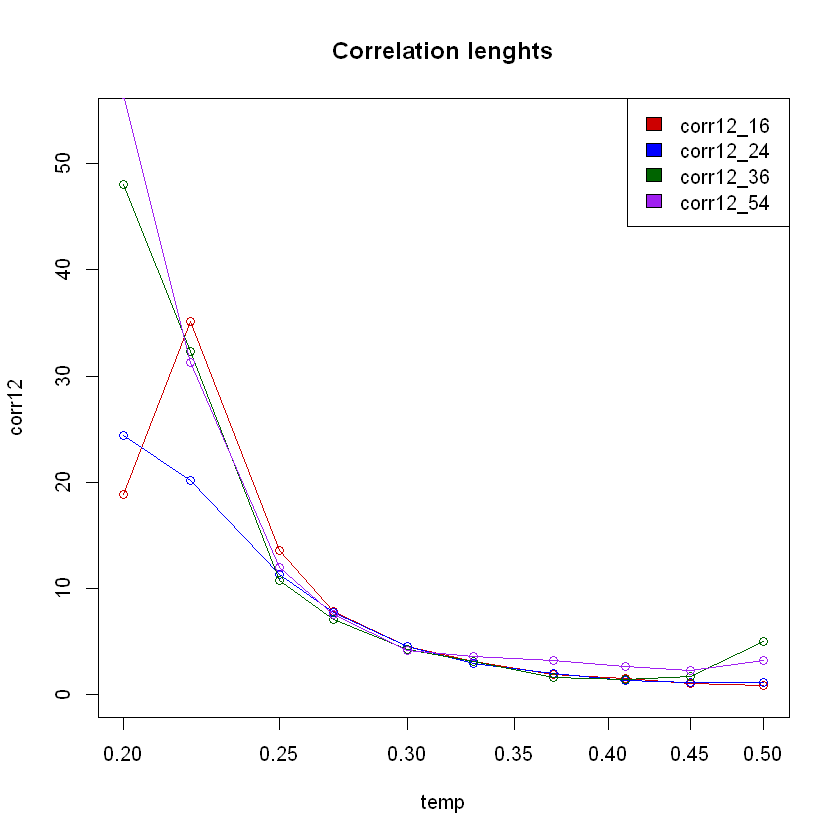

In [81]:
# These are the first five simulations with the even less broad temp range 0.2 to 0.5
for (sim_index in 6) {
	size <- simulations$size[sim_index]
	lowest_index <- simulations$lowest_index[sim_index]
	hightest_index <- simulations$hightest_index[sim_index]

	d <- overview[overview$index >= lowest_index & overview$index <= hightest_index, ]

	plot(corr12 ~ temp, data = d, log = "x", ylim = c(0, 54), col = "red3", type = "o")
	title(paste("Correlation lenghts"))
	legend <- list(names = c("corr12_16"), cols = "red3")

	add_plot_line <- function(formula, data, name, col) {
		points(formula, data = data, col = col)
		lines(formula, data = data, col = col)
		legend$names <- append(legend$names, c(name))
		legend$cols <- append(legend$cols, c(col))
		legend
	}

	sim_index <- 7

	size <- simulations$size[sim_index]
	lowest_index <- simulations$lowest_index[sim_index]
	hightest_index <- simulations$hightest_index[sim_index]

	d <- overview[overview$index >= lowest_index & overview$index <= hightest_index, ]

	legend <-add_plot_line(corr12 ~ temp, d, paste("corr12_", size, sep = ""), col = "blue")

	sim_index <- 8

	size <- simulations$size[sim_index]
	lowest_index <- simulations$lowest_index[sim_index]
	hightest_index <- simulations$hightest_index[sim_index]

	d <- overview[overview$index >= lowest_index & overview$index <= hightest_index, ]

	legend <-add_plot_line(corr12 ~ temp, d, paste("corr12_", size, sep = ""), col = "darkgreen")

	sim_index <- 9

	size <- simulations$size[sim_index]
	lowest_index <- simulations$lowest_index[sim_index]
	hightest_index <- simulations$hightest_index[sim_index]

	d <- overview[overview$index >= lowest_index & overview$index <= hightest_index, ]

	legend <-add_plot_line(corr12 ~ temp, d, paste("corr12_", size, sep = ""), col = "purple")

	legend("topright", y = legend$names, fill = legend$cols)
}

## Correlation functions

[1] 0.20 0.22 0.25 0.27 0.30 0.33 0.37 0.41 0.45 0.50

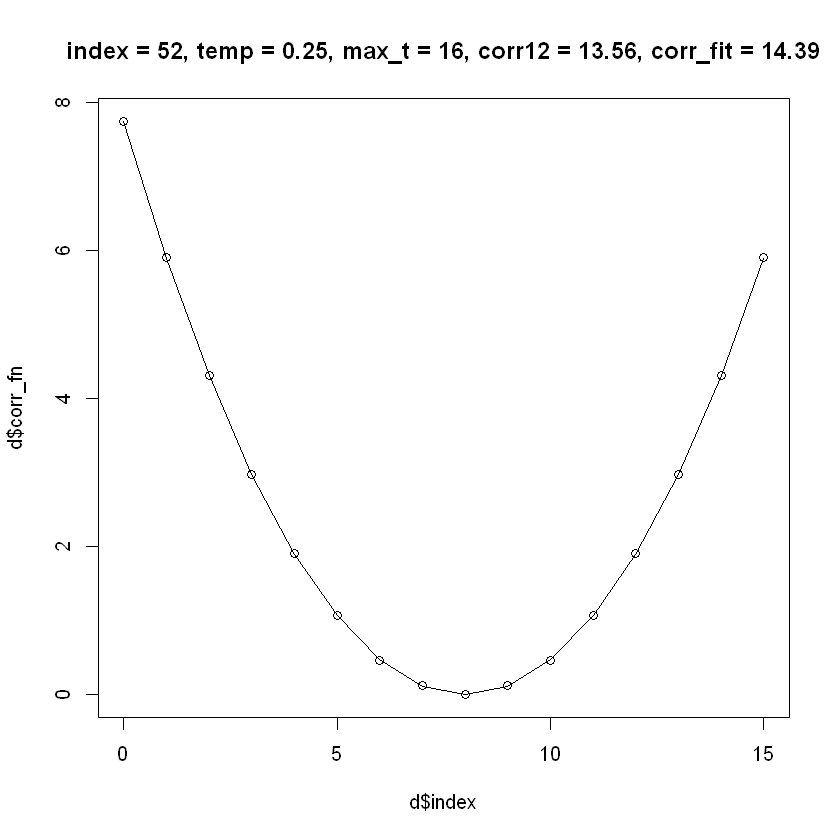

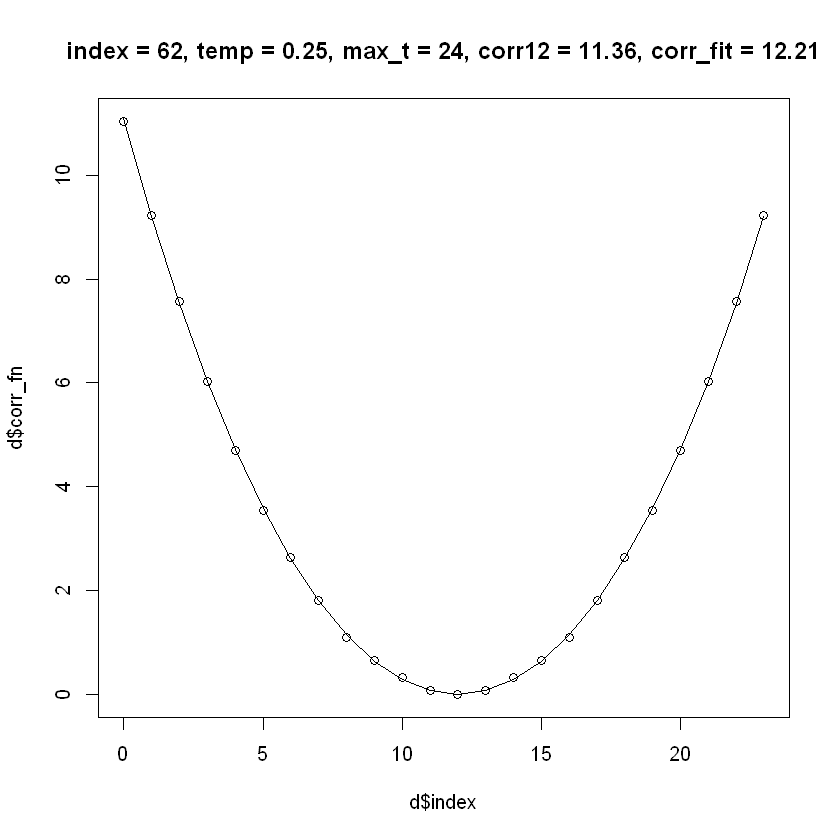

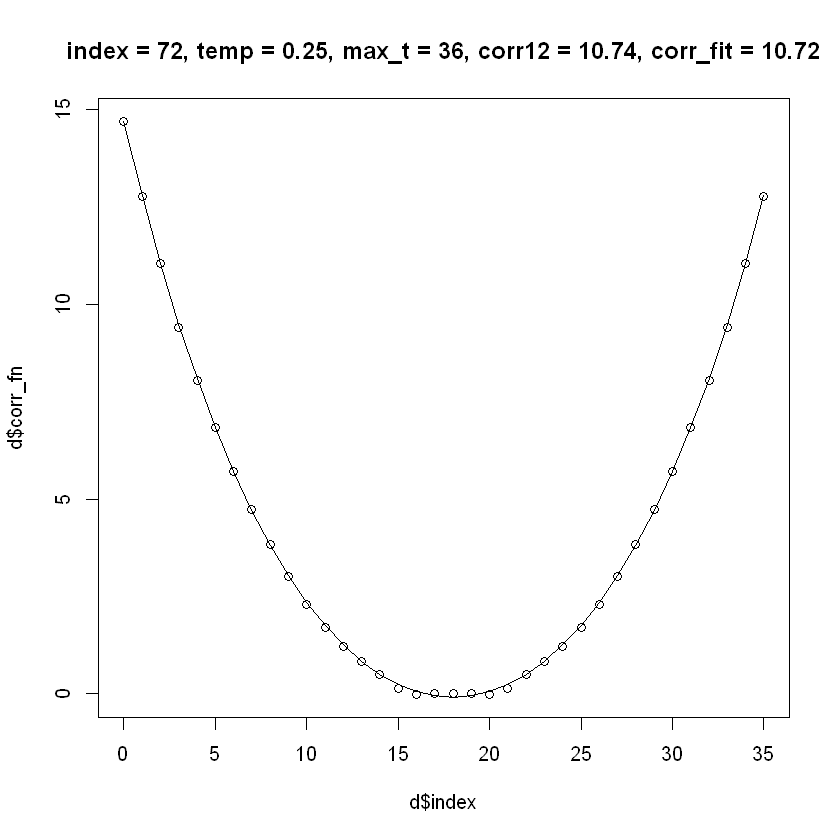

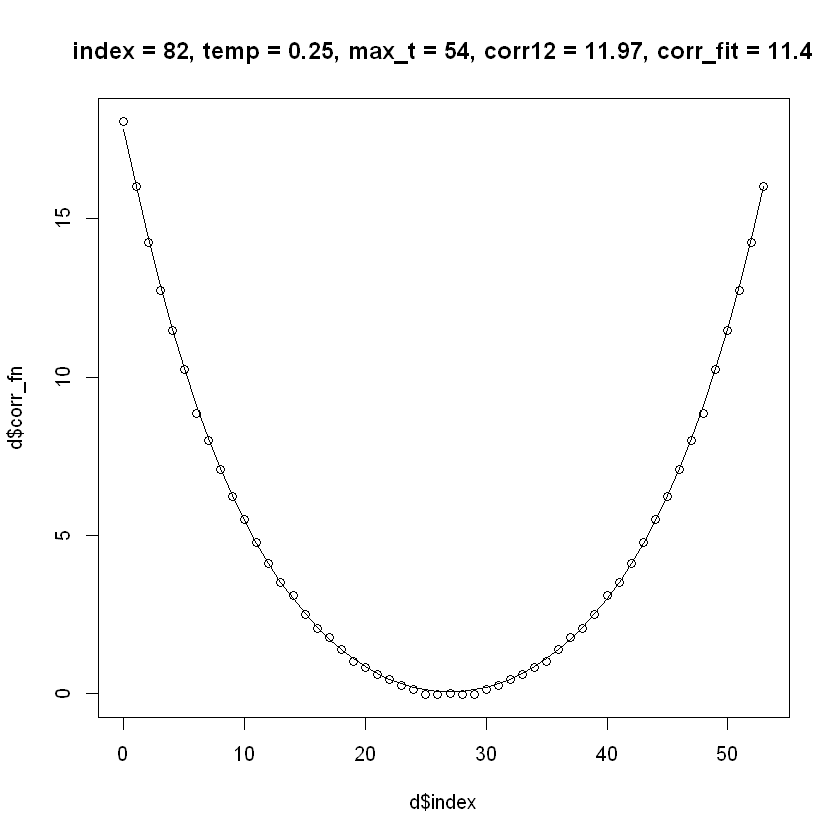

In [31]:
fit <- read.csv("..\\data\\results_fit.csv", header = TRUE, sep = ",")

overview$temp[overview$index >= 50 & overview$index < 60]

#indices <- overview$index[overview$temp >= 0.24 & overview$temp <= 0.26]
indices <- overview$index[overview$index >= 50 & overview$temp == 0.25]
for (index in indices) {
	d <- read.csv(paste("..\\data\\plot_data\\correlation_", index, ".csv", sep = ""), header = FALSE)
	colnames(d) <- c("corr_fn")
	d$index <- 1:nrow(d) - 1
	d$corr_fn <- d$corr_fn[d$index == (nrow(d) / 2)] - d$corr_fn

	d$sym_corr_fn <- d$corr_fn
	for (i in 1:(nrow(d) - 1)) {
		d$sym_corr_fn[d$index == i] <- (d$corr_fn[d$index == i] + d$corr_fn[d$index == (nrow(d) - i)]) / 2
	}
	d$corr_fn <- d$sym_corr_fn

	params <- fit[fit$index == index, ]
	d$fit <- params$a * cosh(params$m * (d$index - params$n / 2)) + params$b
	plot(d$index, d$corr_fn)
	title(paste("index = ", index, ", temp = ", round(overview$temp[overview$index == index],  digits = 3), ", max_t = ", overview$max_t[overview$index == index], ", corr12 = ", overview$corr12[overview$index == index], ", corr_fit = ", overview$corr_fit[overview$index == index], sep = ""))
	lines(d$index, d$fit)
}

## Comparing lattice sizes

In this section we compare the different lattice sizes for the same coupling constants.

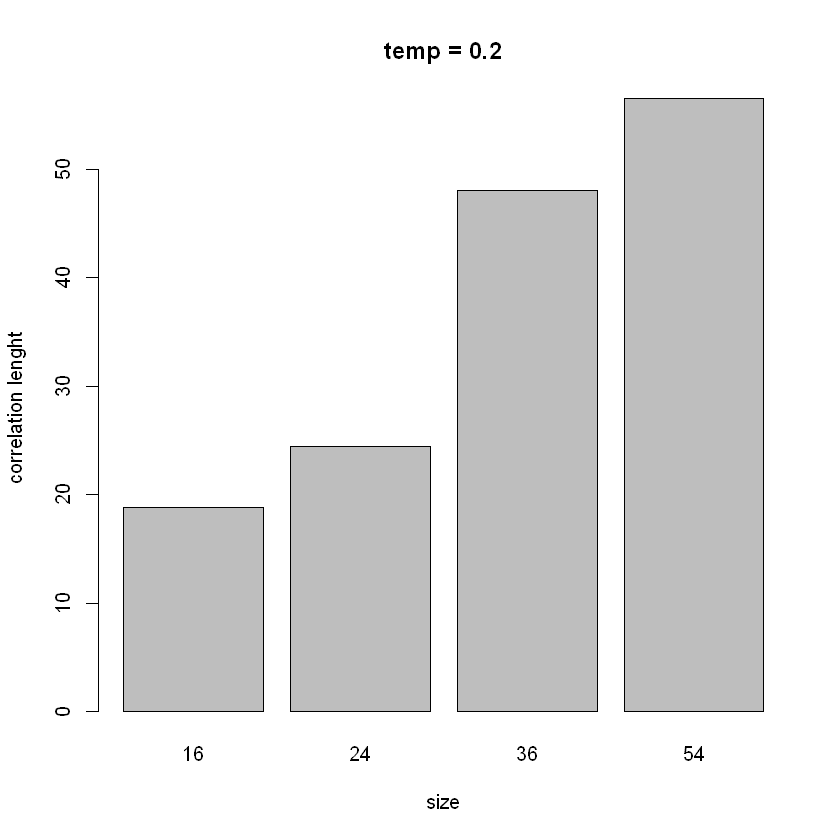

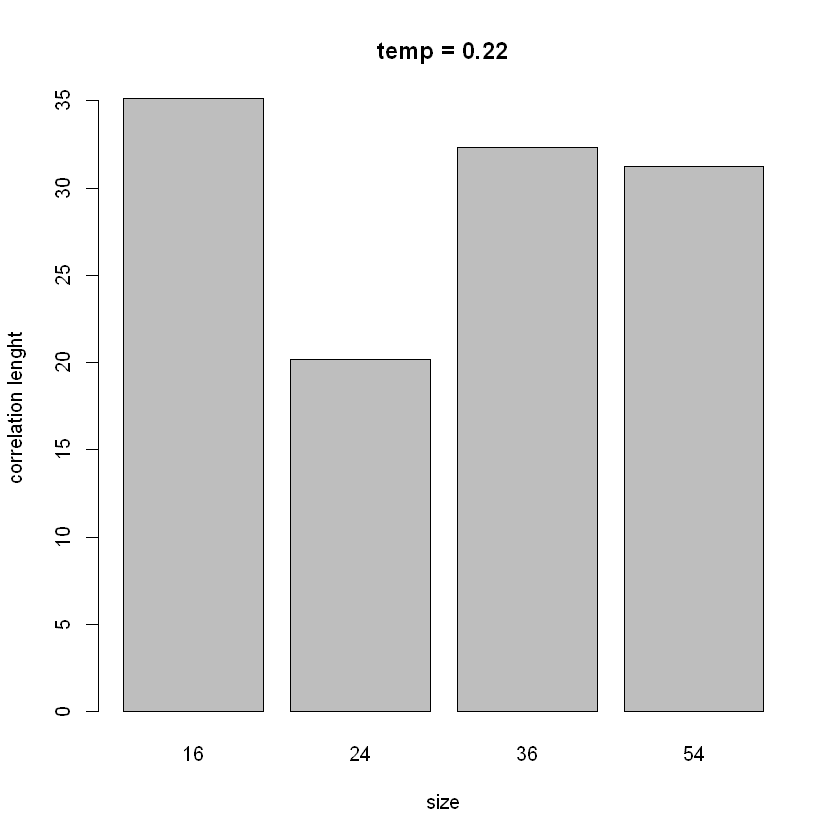

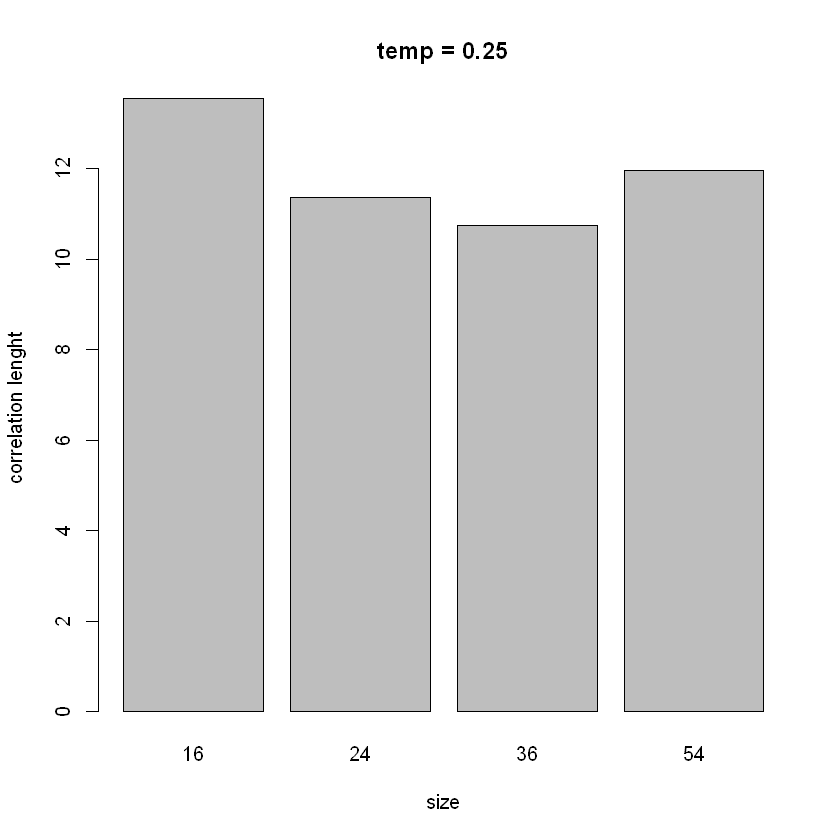

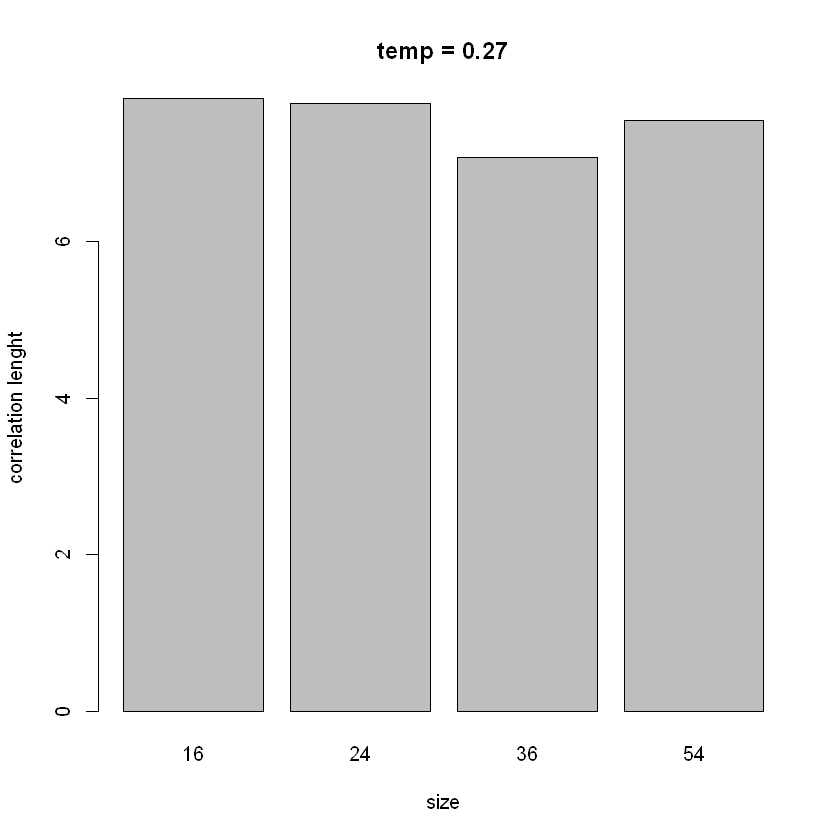

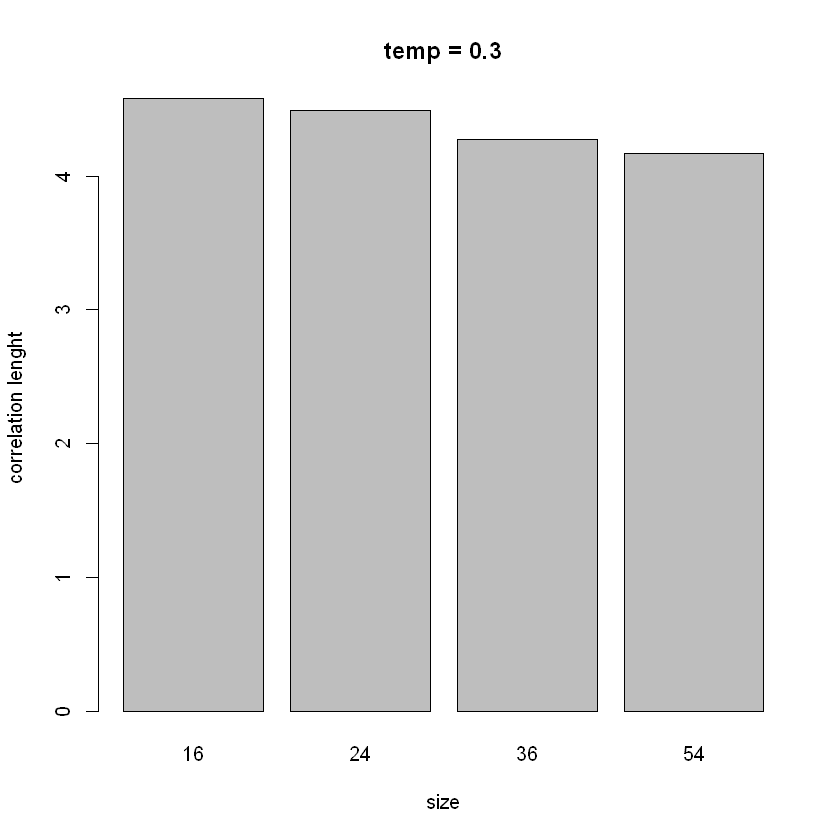

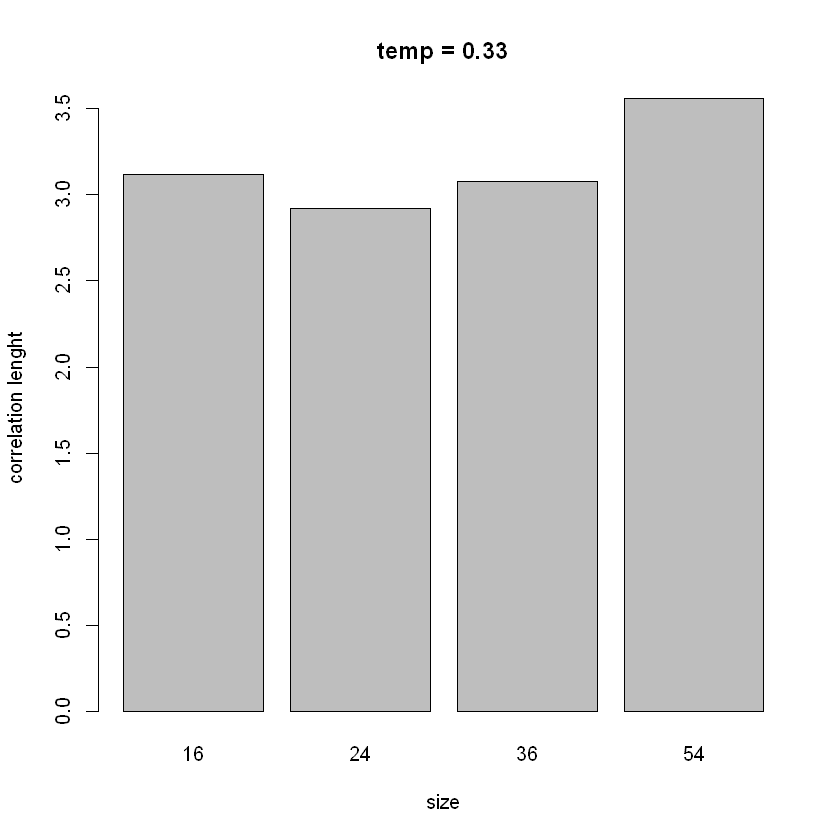

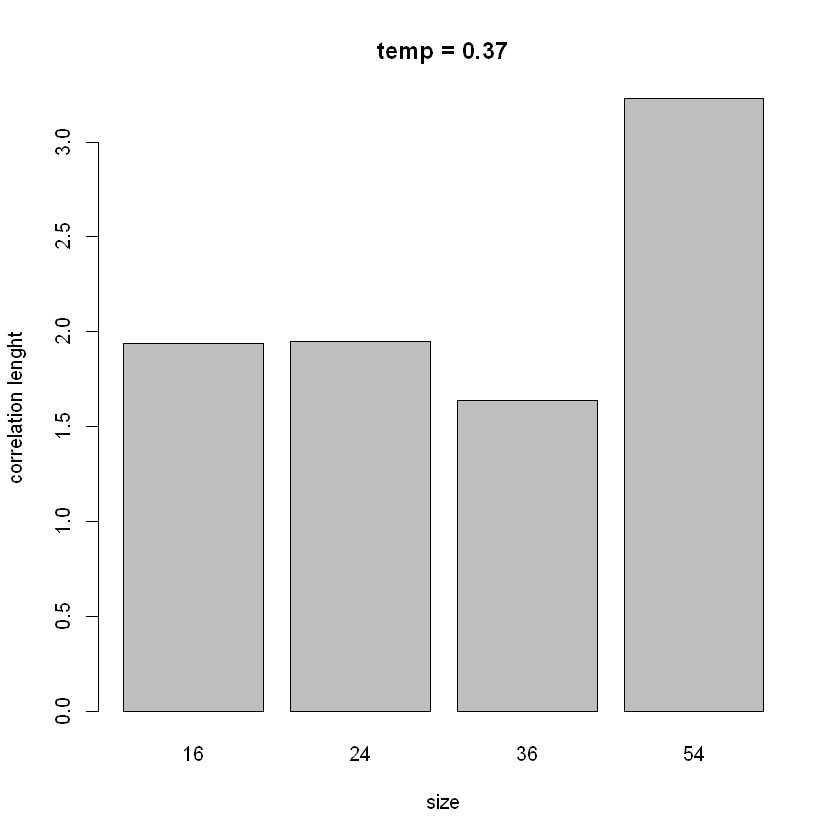

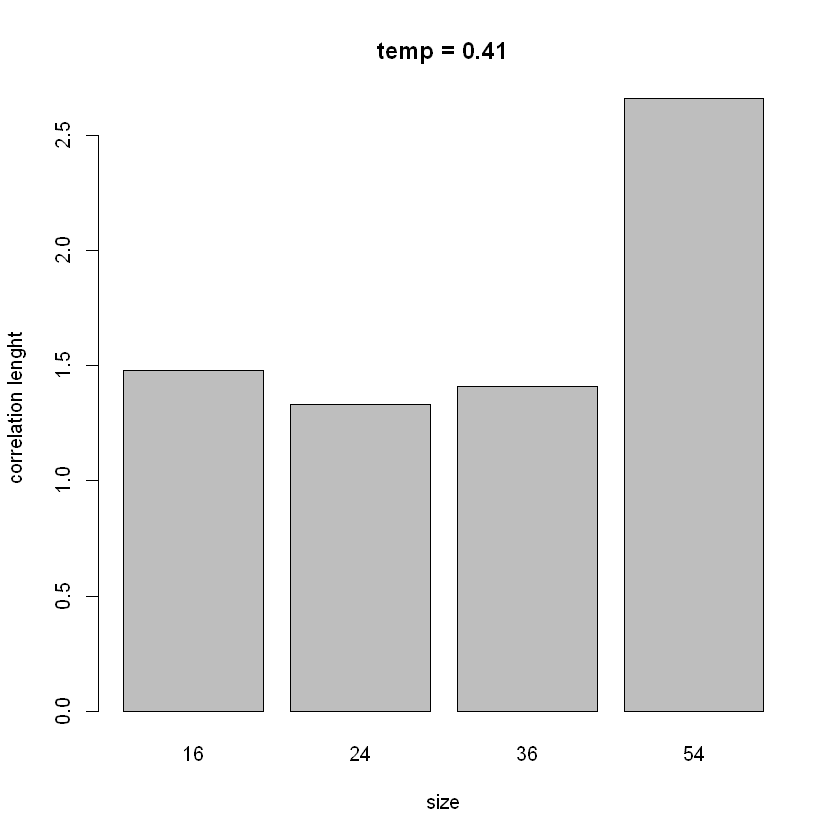

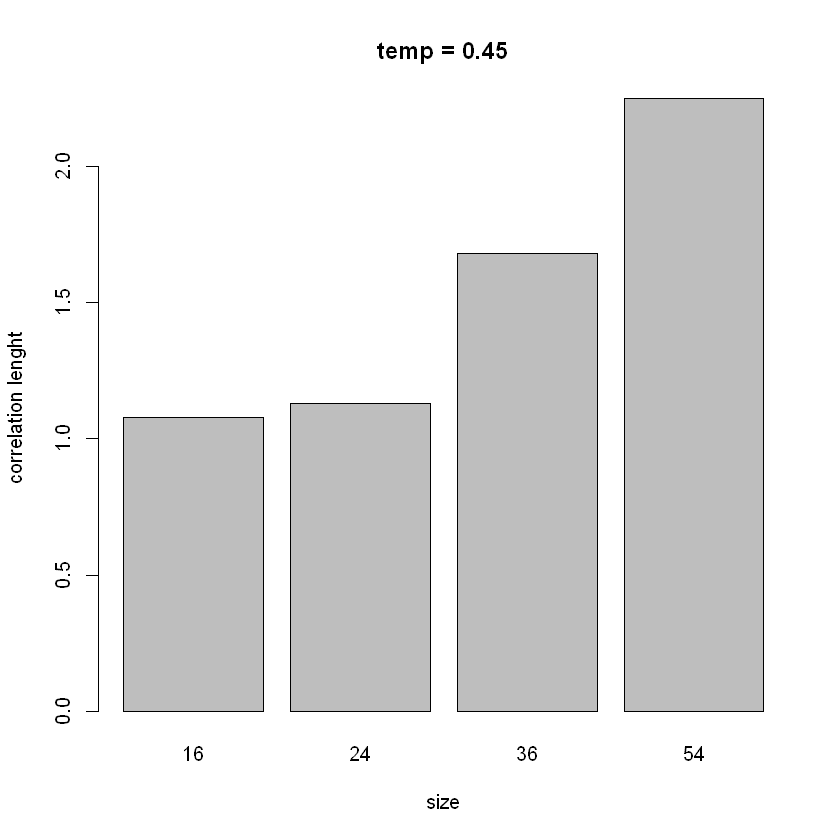

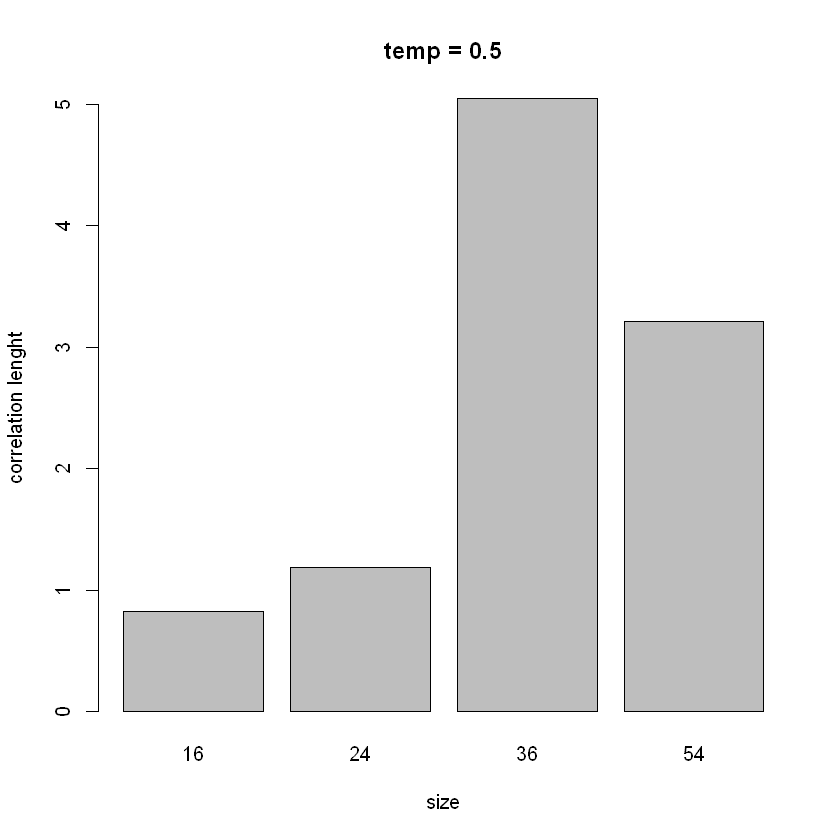

In [32]:
d <- overview[overview$index >= 50, ]

for (temp in d$temp[d$index >= 50 & d$index < 60]) {
	size <- d$max_t[d$temp == temp]
	corr <- d$corr12[d$temp == temp]

	barplot(corr, names.arg = size, xlab = "size", ylab = "correlation lenght")
	title(paste("temp =", temp))
}

## Step-scaling functions

Here we plot the step-scaling functions $\xi (1.5 L) / \xi (L) \sim \xi(L) / L$. In a first step, we only utilize the correlation lenghts `corr12`, that only considers the first and second non-zero momentum modes.

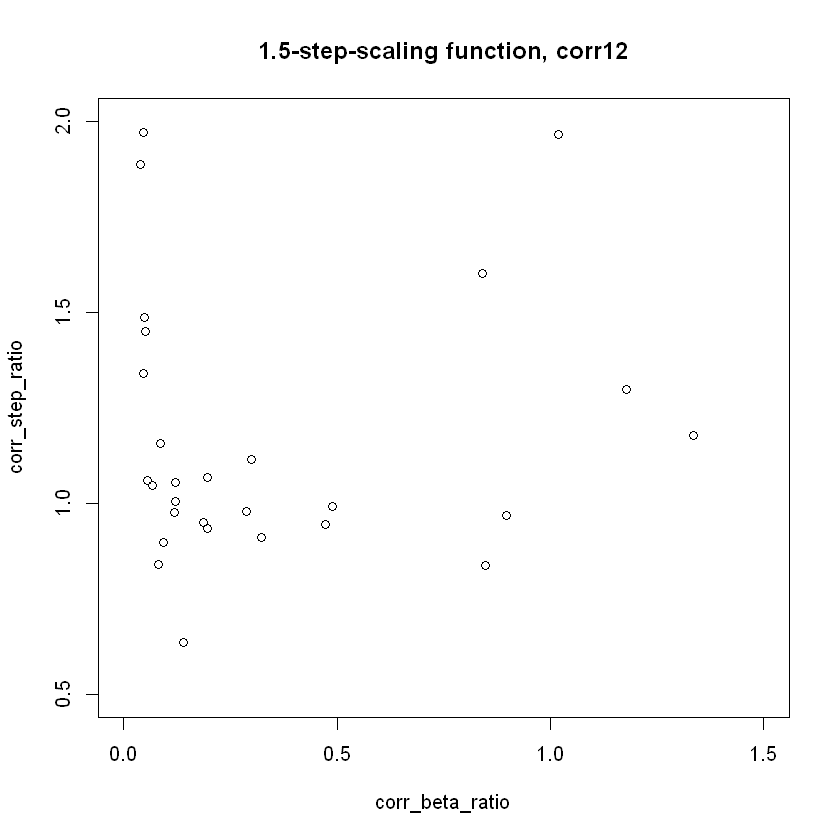

In [84]:
l_index <- 6

size_l <- simulations$size[l_index]
lowest_index_l <- simulations$lowest_index[l_index]
hightest_index_l <- simulations$hightest_index[l_index]

size_2l <- simulations$size[l_index + 1]
lowest_index_2l <- simulations$lowest_index[l_index + 1]
hightest_index_2l <- simulations$hightest_index[l_index + 1]

d_l <- overview[overview$index >= lowest_index_l & overview$index <= hightest_index_l, ]
d_2l <- overview[overview$index >= lowest_index_2l & overview$index <= hightest_index_2l, ]
xi_l_by_l <- d_l$corr12 / size_l
xi_2l_by_xi_l <- d_2l$corr12 / d_l$corr12

step_scaling_fn <- data.frame(list(
	corr_beta_ratio = xi_l_by_l,
	corr_step_ratio = xi_2l_by_xi_l
))

#step_scaling_fn <- step_scaling_fn[step_scaling_fn$corr_beta_ratio <= 1.0, ]

plot(
	corr_step_ratio ~ corr_beta_ratio,
	data = step_scaling_fn,
	xlim = c(0.0, 1.5),
	ylim = c(0.5, 2.0)#, log = "y"
)

for (l_index in c(7, 8)) {

size_l <- simulations$size[l_index]
lowest_index_l <- simulations$lowest_index[l_index]
hightest_index_l <- simulations$hightest_index[l_index]

size_2l <- simulations$size[l_index + 1]
lowest_index_2l <- simulations$lowest_index[l_index + 1]
hightest_index_2l <- simulations$hightest_index[l_index + 1]

d_l <- overview[overview$index >= lowest_index_l &
	overview$index <= hightest_index_l, ]
d_2l <- overview[overview$index >= lowest_index_2l &
	overview$index <= hightest_index_2l, ]
xi_l_by_l <- d_l$corr12 / size_l
xi_2l_by_xi_l <- d_2l$corr12 / d_l$corr12

step_scaling_fn <- data.frame(list(
	corr_beta_ratio = xi_l_by_l,
	corr_step_ratio = xi_2l_by_xi_l
))

#step_scaling_fn <- step_scaling_fn[step_scaling_fn$corr_beta_ratio <= 1.0, ]

points(corr_step_ratio ~ corr_beta_ratio, data = step_scaling_fn)
}

title("1.5-step-scaling function, corr12")